In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split

df = pd.read_csv("music.csv")
print(df)

        zcr   spectral_c      rolloff      mfcc1       mfcc2      mfcc3  \
0     35042  1648.884832  3760.300129 -233.72897  101.190280  17.647953   
1     34067  1324.527825  2711.484919 -209.80392  124.464760  10.309394   
2     77661  2280.154186  4732.983059 -144.92339   95.732994 -21.616442   
3     52454  1817.230590  3943.831966 -213.26424  115.164760 -11.698170   
4     23406  1151.310495  2312.179728 -301.70804  111.533280  21.896053   
..      ...          ...          ...        ...         ...        ...   
994   50067  2215.267219  5026.545733 -294.05438   84.636290  39.074047   
995   58145  1993.412987  4248.252837 -192.11354  105.568050 -26.025105   
996   50691  1311.144563  2723.742024 -237.32549  146.824200 -24.415499   
997  136935  3905.066342  8036.631063 -158.35344   49.628300  21.610638   
998   41982  1854.631916  4282.218009 -219.79694  100.832466  -1.431354   

         mfcc4      mfcc5      mfcc6      mfcc7  ...     mfcc12     mfcc13  \
0    23.734175   2.08

In [2]:
X = df[['zcr', 'spectral_c', 'rolloff', 'mfcc1', 'mfcc2', 'mfcc3',
           'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9',
           'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15',
           'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20']].values

y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [3]:
from sklearn.neighbors import KNeighborsClassifier

model_1 = KNeighborsClassifier(n_neighbors = 5)

model_1.fit(X_train, y_train)

KNeighborsClassifier()

# Score

In [4]:
# TODO: Reshape y_test
print('Train score :', model_1.score(X=X_train,y=y_train))
print('Test score :', model_1.score(X_test,y_test))

Train score : 0.4755944931163955
Test score : 0.265


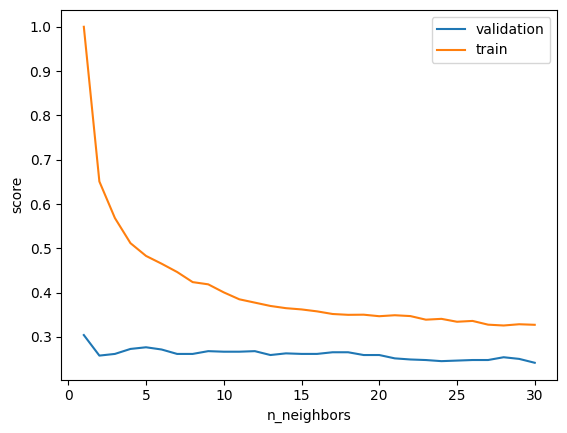

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve

k_1 = np.arange(1, 31)
train_score_1, val_score_1 = validation_curve(estimator=model_1, X=X_train, y=y_train, param_name='n_neighbors', param_range=k_1, cv = 5)

#5 splits sets de cross validation, puis on fait la moyenne des scores obtenus sur chacun des 5 splits

plt.plot(k_1, val_score_1.mean(axis = 1), label = 'validation')
plt.plot(k_1, train_score_1.mean(axis = 1), label = 'train')

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

In [6]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
           'metal', 'pop', 'reggae', 'rock' ] 

np.max(val_score_1.mean(axis = 1))
np.argmax(val_score_1.mean(axis = 1)) + 1

#+1 pour avoir le nombre de voisins optimal (indice commençant à 0)
#on trouve entre 5 et 10 voisins pour environ 30-35% de réussite

sns.set()
mat = confusion_matrix(y_test, model_1.predict(X_test))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=genres, yticklabels=genres)
plt.xlabel('true label')
plt.ylabel('predicted label')

ModuleNotFoundError: No module named 'seaborn'